In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
%matplotlib inline

In [234]:
import psycopg2


postgresDb = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="admin")

In [235]:
class Stockdatadao:
    def __init__(self, db):
        self.db = db

    def select(self, symbol):
        cursor = self.db.cursor()
        sql = """SELECT date_time, open, high, low, close, volume, adj_close
                    FROM stock_data WHERE symbol = %s"""
        val = (symbol,)

        cursor.execute(sql, val)
        result = cursor.fetchall()
        list_stock_data = []

        for item in result:
            list_stock_data.append(
                StockDataViewModel(date_time=item[0], open=item[1], high=item[2], low=item[3],
                                   close=item[4], volume=item[5], adj_close=item[6]))

        cursor.close()
        if result is None:
            return None
        else:
            return list_stock_data


class StockDataViewModel:
    def __init__(self, date_time, open, high, low, close, volume, adj_close):
        self.date_time = date_time
        self.open = open
        self.high = high
        self.low = low
        self.close = close
        self.volume = volume
        self.adj_close = adj_close

    def to_dict(self):
        return {
            'date_time': self.date_time,
            'open': self.open,
            'high': self.high,
            'low': self.low,
            'close': self.close,
            'volume': self.volume,
            'adj_close': self.adj_close
        }

In [236]:
stock_data_dao = Stockdatadao(postgresDb)

stock_data = stock_data_dao.select('AAPL')

df = pd.DataFrame([s.to_dict() for s in stock_data], columns=['date_time', 'open', 'high', 'low', 'close', 'volume', 'adj_close'])

df = df.rename(columns={'date_time': 'date'})

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df['volume'] = df['volume'].astype(float)
print(df.head(10))

                open      high       low     close       volume  adj_close
date                                                                      
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600.0   0.099584
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800.0   0.094388
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000.0   0.087461
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600.0   0.089625
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600.0   0.092224
1980-12-19  0.126116  0.126674  0.126116  0.126116   48630400.0   0.097852
1980-12-22  0.132254  0.132813  0.132254  0.132254   37363200.0   0.102614
1980-12-23  0.137835  0.138393  0.137835  0.137835   46950400.0   0.106945
1980-12-24  0.145089  0.145647  0.145089  0.145089   48003200.0   0.112573
1980-12-26  0.158482  0.159040  0.158482  0.158482   55574400.0   0.122964


In [237]:
###get the dataset of AAPL stock from 2013-01-01 to 2023-06-01 from df

df = df.loc['2013-01-01':'2023-06-01']

print(df.head(10))

                 open       high        low      close       volume  adj_close
date                                                                          
2013-01-02  19.779285  19.821428  19.343929  19.608213  560518000.0  16.813864
2013-01-03  19.567142  19.631071  19.321428  19.360714  352965200.0  16.601629
2013-01-04  19.177500  19.236786  18.779642  18.821428  594333600.0  16.139196
2013-01-07  18.642857  18.903570  18.400000  18.710714  484156400.0  16.044260
2013-01-08  18.900356  18.996071  18.616072  18.761070  458707200.0  16.087437
2013-01-09  18.660713  18.750357  18.428213  18.467857  407604400.0  15.836020
2013-01-10  18.876785  18.882856  18.411428  18.696787  601146000.0  16.032324
2013-01-11  18.607143  18.761429  18.536428  18.582144  350506800.0  15.934022
2013-01-14  17.952856  18.125000  17.803928  17.919643  734207600.0  15.365923
2013-01-15  17.796429  17.821072  17.263571  17.354286  876772400.0  14.881134


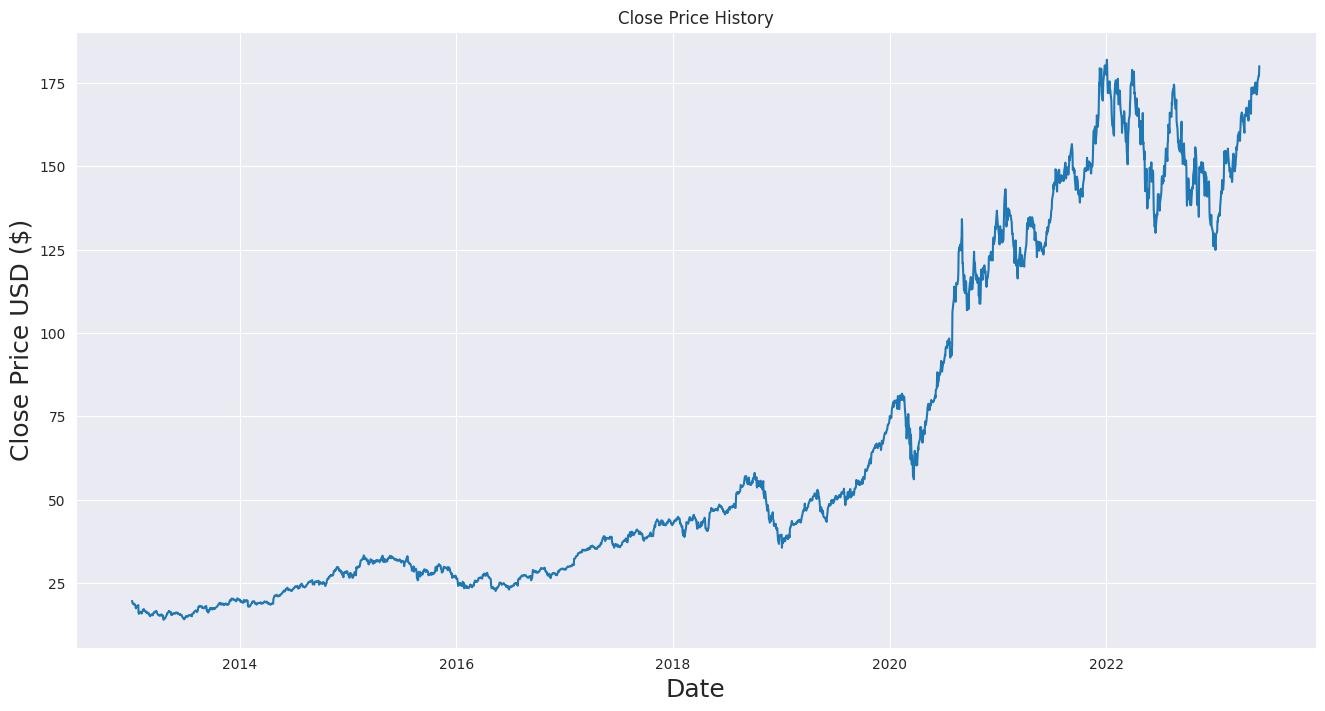

In [238]:
###plot the close price history of AAPL stock from 2013-01-01 to 2023-06-01 from df using matplotlib

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [239]:
#adding a field to the data set for calculating the mean of high and low price in df

df['Mean'] = (df['high'] + df['low']) / 2.0

df.head(2)

,open,high,low,close,volume,adj_close,Mean
date,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,560518000.0,16.813864,19.582679
2013-01-03,19.567142,19.631071,19.321428,19.360714,352965200.0,16.601629,19.476250


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2622 entries, 2013-01-02 to 2023-06-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       2622 non-null   float64
 1   high       2622 non-null   float64
 2   low        2622 non-null   float64
 3   close      2622 non-null   float64
 4   volume     2622 non-null   float64
 5   adj_close  2622 non-null   float64
 6   Mean       2622 non-null   float64
dtypes: float64(7)
memory usage: 163.9 KB


In [241]:
#We need to restructure the data set by adding a target column ‘Actual’, which will the stock prices for the next day.

steps=-1
dataset_for_prediction = df.copy()
dataset_for_prediction['Actual'] = dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,open,high,low,close,volume,adj_close,Mean,Actual
date,,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,560518000.0,16.813864,19.582679,19.476250
2013-01-03,19.567142,19.631071,19.321428,19.360714,352965200.0,16.601629,19.476250,19.008214
2013-01-04,19.177500,19.236786,18.779642,18.821428,594333600.0,16.139196,19.008214,18.651785


In [242]:
##dropping columns with null values in dataset_for_prediction

dataset_for_prediction = dataset_for_prediction.dropna()

Text(0.5, 1.0, ' Apple Stock Value')

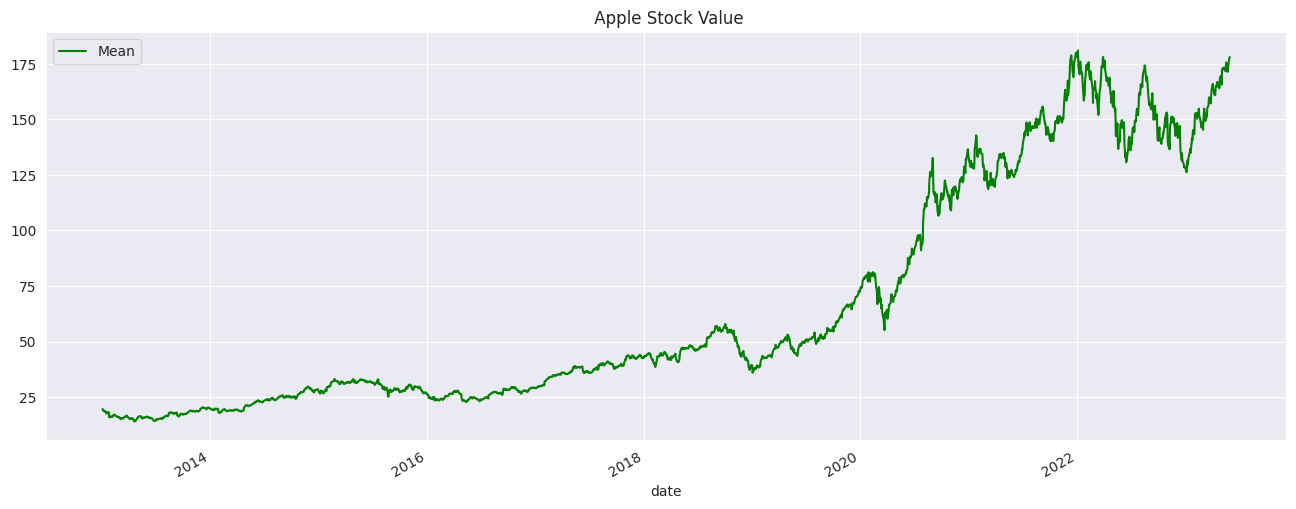

In [243]:
#plot the mean stock prices for the current dataset and lock the trends from df

dataset_for_prediction['Mean'].plot(color='green', figsize=(16, 6))
plt.legend(['Mean'])
plt.title(" Apple Stock Value")

Text(0.5, 1.0, ' Apple Stock Volume')

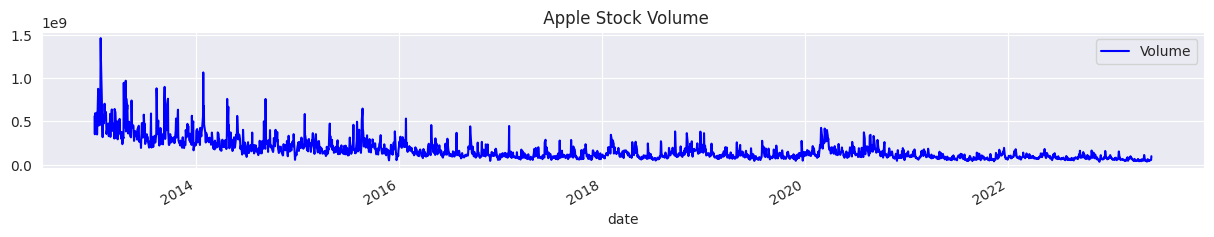

In [244]:
#Plotting volume of Apple stocks sold daily from df

dataset_for_prediction['volume'].plot(color='blue', figsize=(15, 2))
plt.legend(['Volume'])
plt.title(" Apple Stock Volume")

In [245]:
#Normalizing the input and target features
#Since the stock prices and volume are on a different scale, we need to normalize the data. We use MinMaxScaler; it will scale the data to a fixed range between 0 to 1
# Scaling the input features- Low, High, Open, Close, Volume, Adjusted Close, and Mean

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_input = scaler.fit_transform(dataset_for_prediction[['low', 'high', 'open', 'close', 'volume', 'adj_close', 'Mean']])
scaled_input = pd.DataFrame(scaled_input)

X = scaled_input
X.head(2)

,0,1,2,3,4,5,6
0,0.033806,0.032905,0.035096,0.033682,0.368477,0.028410,0.033351
1,0.033670,0.031776,0.033839,0.032210,0.222893,0.027149,0.032714


In [246]:
#Scaling the target feature- Actual (Mean of High and Low) price

scaler_output = MinMaxScaler(feature_range=(0, 1))
scaled_output = scaler_output.fit_transform(dataset_for_prediction[['Actual']])

scaler_output = pd.DataFrame(scaled_output)

y = scaler_output
y.head(2)

,0
0,0.032714
1,0.029911


In [247]:
X.rename(columns={0: 'low', 1: 'high', 2: 'open', 3: 'close', 4: 'volume', 5: 'adj_close', 6: 'Mean'}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)

,low,high,open,close,volume,adj_close,Mean
date,,,,,,,
2013-01-02,0.033806,0.032905,0.035096,0.033682,0.368477,0.028410,0.033351
2013-01-03,0.033670,0.031776,0.033839,0.032210,0.222893,0.027149,0.032714


In [248]:
#renaming the target variable

y.rename(columns={0: 'Stock Price Next Day'}, inplace=True)
y.index=dataset_for_prediction.index

y.head(2)

,Stock Price Next Day
date,
2013-01-02,0.032714
2013-01-03,0.029911


In [249]:
#Splitting the dataset into training and testing sets

train_size = int(len(df) * 0.80)
test_size = int(len(df) - train_size)
print(test_size)

525


In [250]:
#Splitting the dataset into training and testing sets using train_size and test_size from df and y respectively
train_X, train_Y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_Y = X[train_size:].dropna(), y[train_size:].dropna()

In [251]:
test_X.columns

Index(['low', 'high', 'open', 'close', 'volume', 'adj_close', 'Mean'], dtype='object')

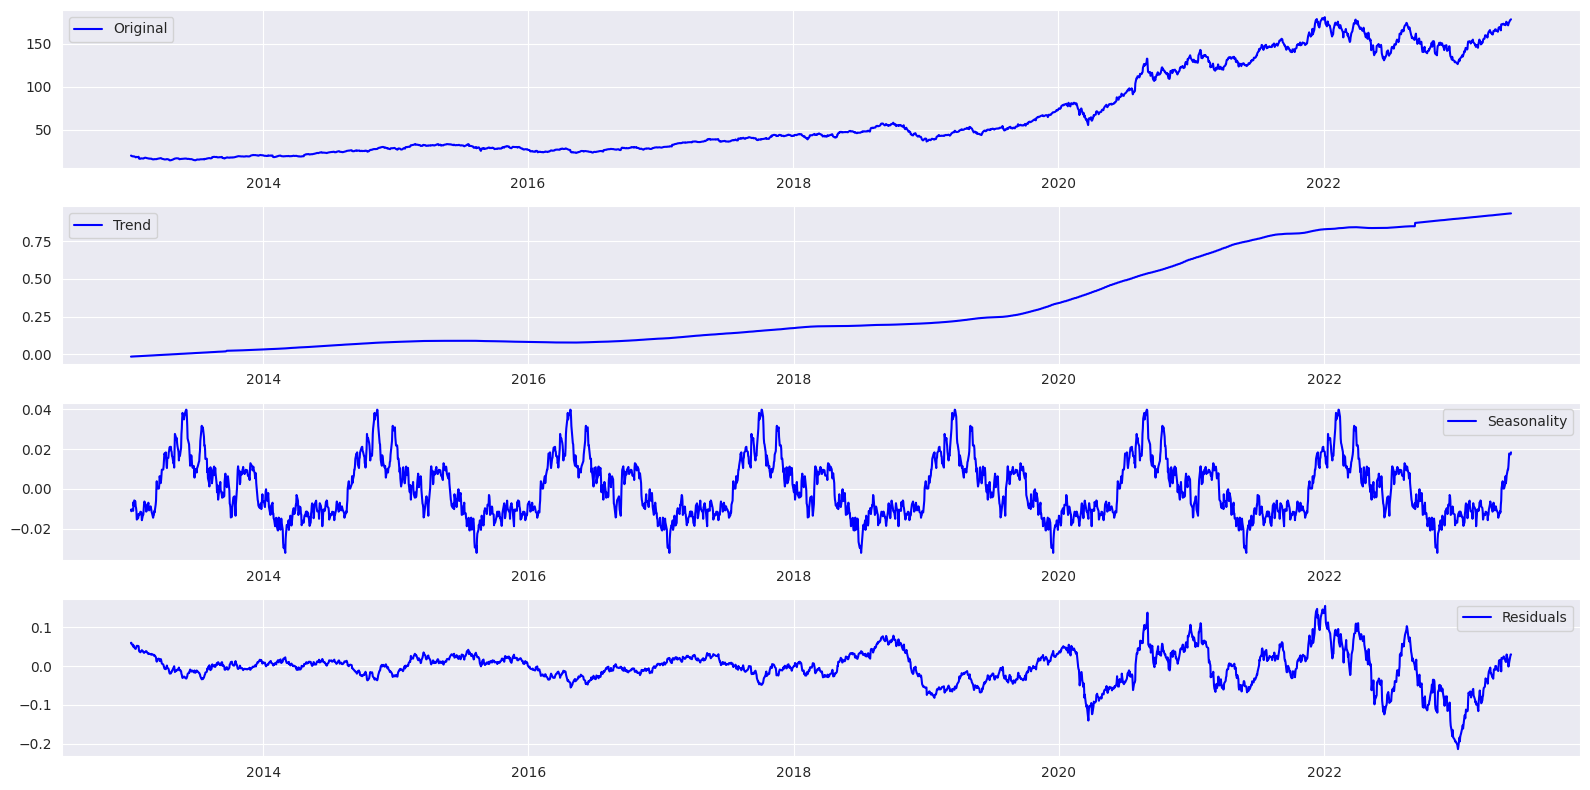

In [252]:
# ###Understanding the Time series data
# Decomposing Time Series into several components-Trend, Seasonality, and Random noise
#
# We know that Time series data is composed of Level, Trend, Seasonality, and Random noise. Let’s decompose the data and plot the trend, seasonality, and randomness in the data.
#
# We use statsmodel for seasonal decompose as an additive model and the frequency of the time series, which is the periodicity of the data, which is 365 days for yearly data.
#
# Additive model = Trend + Seasonality + Random Noise

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(X['Mean'], model='add', period=365, extrapolate_trend='freq', two_sided=True, filt=None)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(df['Mean'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [253]:
###Check for Data Stationarity using Augmented Dickey-Fuller(ADF) test.

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def test_adf(series, title=''):
    dfout={}
    dftest = sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)


In [254]:
#Checking for stationarity in the data using the ADF test

y_test = y['Stock Price Next Day'][:train_size].dropna()
test_adf(y_test, 'Stock Price Next Day')

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Stock Price Next Day


In [255]:
#Make the data stationary by differencing the data

y_test_diff = y_test.diff().dropna()
test_adf(y_test_diff, 'Stock Price Next Day')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary Stock Price Next Day


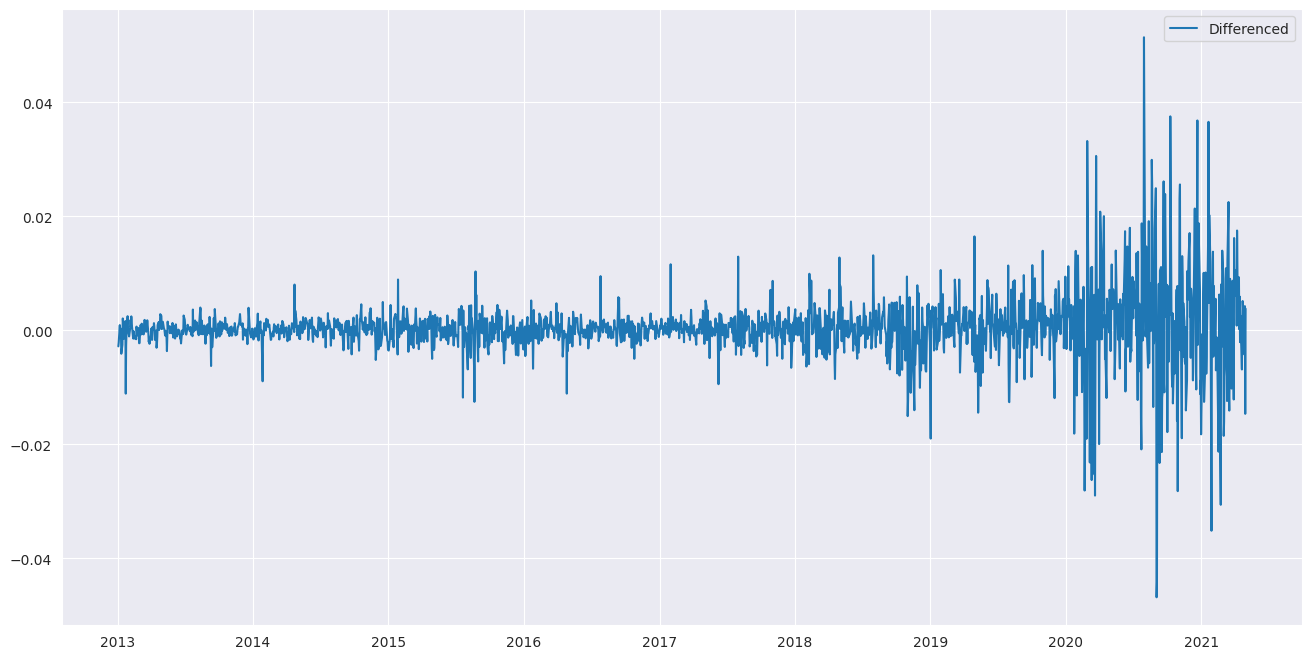

In [256]:
#Plotting the differenced data

plt.figure(figsize=(16, 8))
plt.plot(y_test_diff, label='Differenced')
plt.legend(loc='best')
plt.show()

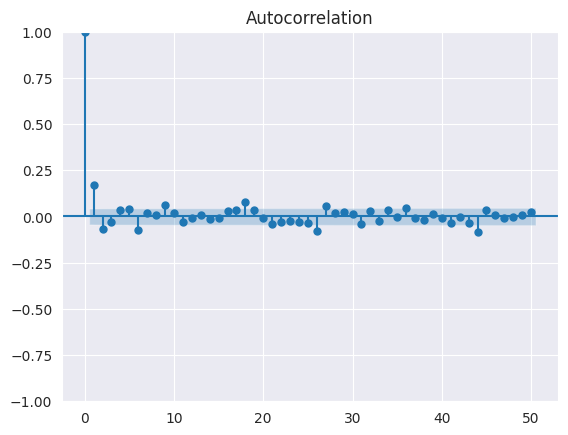

In [257]:
#Plotting the autocorrelation plot for the differenced data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y_test_diff, lags=50)
plt.show()

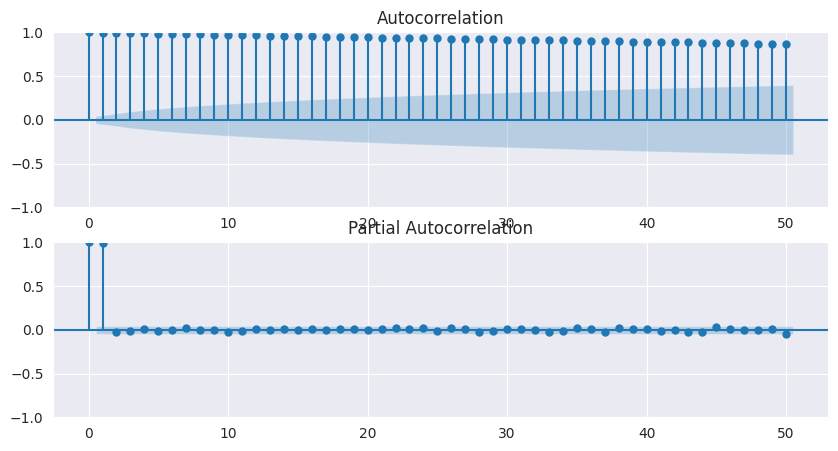

In [258]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [259]:
from pmdarima.arima import auto_arima

step_wise=auto_arima(train_Y,
 exogenous= train_X,
 start_p=1, start_q=1,
 max_p=7, max_q=7,
 d=1, max_d=7,
 trace=True,
 error_action="ignore",
 suppress_warnings=True,
 stepwise=True)

step_wise.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15878.045, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15803.917, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15863.512, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15875.159, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15798.837, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-15880.881, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-15882.881, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-15880.893, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-15878.918, Time=0.42 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-15878.734, Time=0.04 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.807 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2097
Model:               SARIMAX(2, 1, 0)   Log Likelihood                7945.441
Date:                Sun, 02 Jul 2023   AIC                         -15882.881
Time:                        02:32:25   BIC                         -15860.290
Sample:                             0   HQIC                        -15874.606
                               - 2097                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.464      0.014    6.09e-05       0.001
ar.L1          0.1874      0.009     21.364      0.000       0.170       0.205
ar.L2         -0.1010      0.011     -8.887      0.000      -0.123      -0.079
sigma2      2.984e-05   3.18e-07     93.828      0.000    2.92e-05    3.05e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21624.97
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              21.10   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [260]:
#Fitting the model

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train_Y, exog=train_X, order=(2, 1, 0), enforce_invertibility=False, enforce_stationarity=False)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [261]:
results = model.fit(maxiter=200, method='powell', disp=True, full_output=True, start_ar_lags=2)
results.summary()

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method powell is: xtol, ftol, maxfun, start_direc. The list of unsupported keyword arguments passed include: start_ar_lags. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: -3.888929
         Iterations: 5
         Function evaluations: 494


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Stock Price Next Day   No. Observations:                 2097
Model:                 SARIMAX(2, 1, 0)   Log Likelihood                8155.085
Date:                  Sun, 02 Jul 2023   AIC                         -16290.170
Time:                          02:32:27   BIC                         -16233.702
Sample:                               0   HQIC                        -16269.484
                                 - 2097                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
low            0.2710      0.015     18.680      0.000       0.243       0.299
high           0.1343      0.020      6.662      0.000       0.095       0.174
open          -0.3386      0.017    -19.833      0.000      -0.372      -0.305
close          0.2720      0.707      0.385      0.701      -1.114       1.658
volume         0.0021      0.003      0.774      0.439      -0.003       0.007
adj_close      0.3365      0.720      0.467      0.640      -1.075       1.748
Mean          -0.1049      0.010    -10.961      0.000      -0.124      -0.086
ar.L1         -0.5093      0.018    -27.896      0.000      -0.545      -0.474
ar.L2         -0.1111      0.016     -7.010      0.000      -0.142      -0.080
sigma2      2.424e-05   2.79e-07     86.978      0.000    2.37e-05    2.48e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):             18945.60
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              21.83   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.99e+18. Standard errors may be unstable.
"""

In [264]:
#Predicting the values

predictions = results.predict(start=train_size, end=train_size+test_size+(steps)-1, exog=test_X)

/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/mnt/learning/last_project/fetch_data_stock/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [268]:
#Plotting the predicted values

act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
# act.info()
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price Next Day']
predictions.rename(columns={0:'Pred'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524 entries, 2021-05-03 to 2023-05-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stock Price Next Day  524 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


<Axes: xlabel='date'>

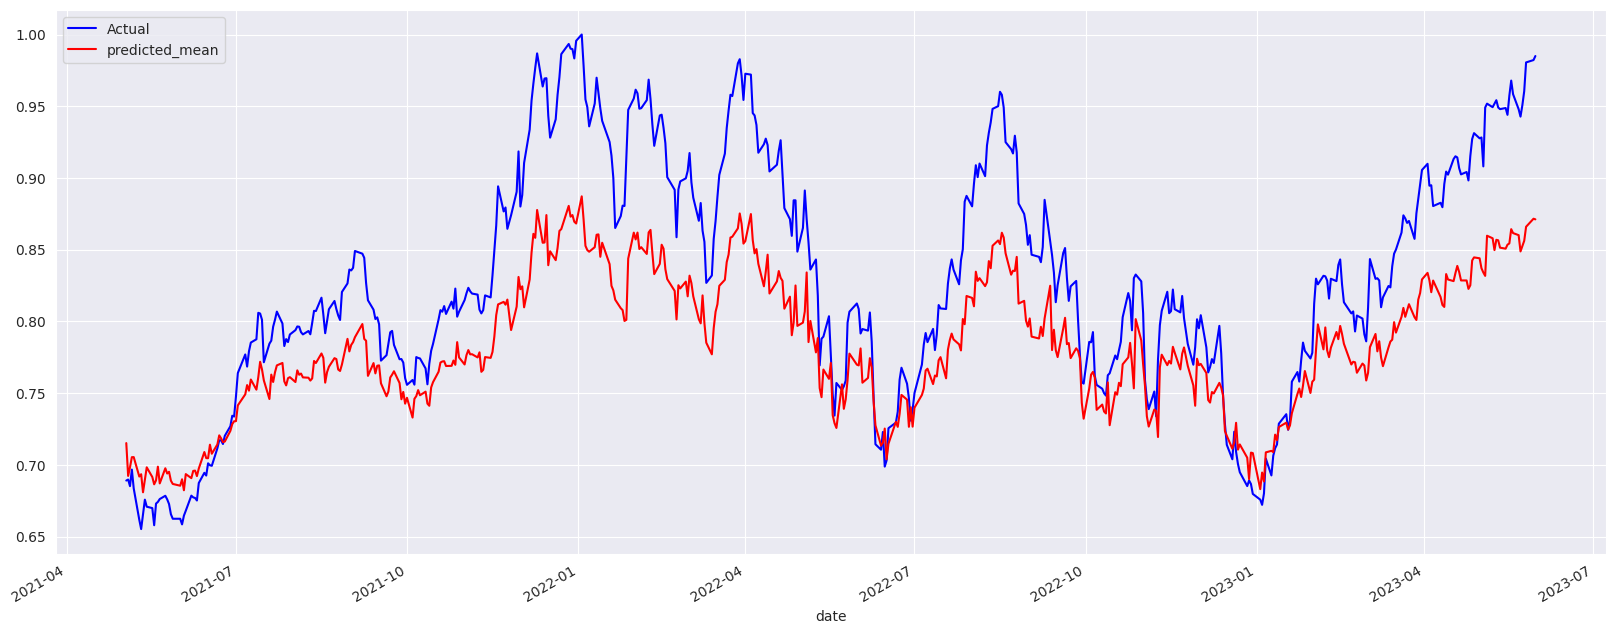

In [271]:
predictions["Actual"].plot(figsize=(20,8), legend=True, color="blue")
predictions["predicted_mean"].plot(legend=True, color="red", figsize=(20,8))S

In [ ]:
S